# Decision Trees / Random Forest - Ejemplo - Sleep

**Contexto**  
Este conjunto de datos contiene el detalle de variables relacionadas con el sueño y hábitos diarios.

**Contenido**  
El conjunto de datos proviene de kaggle: [Sleep Health and Lifestyle Dataset](https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset).  
Contiene 400 renglones con las siguientes columnas:  

| Variable                | Definición                                       | Valor                       |
| ----------------------- | ------------------------------------------------ | --------------------------- |
| Person ID               | Id persona                                       | Numérico                    |
| Gender                  | Genero de la persona                             | Female, Male                |
| Age                     | Edad de la persona                               | Años                        |
| Occupation              | Ocupación de la persona                          | String                      |
| Sleep Duration          | Número de horas que duerme por día               | Horas                       |
| Quality of Sleep        | Calidad del sueño                                | 1 a 10                      |
| Physical Activity Level | Minutos que dedica a actividades físicas diarias | Minutos por día             |
| Stress Level            | Nivel de stress experimentado                    | 1 a 10                      |
| BMI Category            | Indice de masa muscular                          | String                      |
| Blood Pressure          | Presión arterial (sistólica/diastólica)          | String                      |
| Heart Rate              | Ritmo cardiaco en reposo                         | Latidos por minuto          |
| Daily Steps             | Número de pasos que realiza por dia              | Pasos por día               |
| Sleep Disorder          | Desorden de sueño **(variable objetivo)**        | None, Insomnia, Sleep Apnea |

**Planteamiento del problema**  
Se busca predecir si el cliente presentará algún desorden del sueño, de acuerdo sus las características.

In [1]:
# Importar librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import tree

## Cargar Datos

In [2]:
# Importar los datos
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [3]:
# Renombrar columnas
df.columns = ['id_persona', 'genero', 'edad', 'ocupacion', 'duracion_sueño', 'calidad_sueño', 'nivel_actividad',
              'nivel_stress', 'indice_corporal', 'presion_sanguinea', 'ritmo_cardiaco', 'pasos_diarios', 'desorden']

## Mapeos

In [4]:
print(df['genero'].unique())

['Male' 'Female']


In [5]:
df.replace('Female', '0', inplace=True)
df.replace('Male',   '1', inplace=True)
df = df.astype({'genero':'int'})
df.head()

,id_persona,genero,edad,ocupacion,duracion_sueño,calidad_sueño,nivel_actividad,nivel_stress,indice_corporal,presion_sanguinea,ritmo_cardiaco,pasos_diarios,desorden
0,1,1,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,1,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,1,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,1,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,1,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [6]:
print(df['ocupacion'].unique())

['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']


In [7]:
df['ocupacion'].value_counts()

Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: ocupacion, dtype: int64

In [8]:
# Mapeos
df.replace('Manager',              '0', inplace=True)
df.replace('Sales Representative', '1', inplace=True)
df.replace('Scientist',            '2', inplace=True)
df.replace('Software Engineer',    '3', inplace=True)
df.replace('Salesperson',          '4', inplace=True)
df.replace('Accountant',           '5', inplace=True)
df.replace('Teacher',              '6', inplace=True)
df.replace('Lawyer',               '7', inplace=True)
df.replace('Engineer',             '8', inplace=True)
df.replace('Doctor',               '9', inplace=True)
df.replace('Nurse',                '10', inplace=True)
df = df.astype({'ocupacion':'int'})
df.head()

,id_persona,genero,edad,ocupacion,duracion_sueño,calidad_sueño,nivel_actividad,nivel_stress,indice_corporal,presion_sanguinea,ritmo_cardiaco,pasos_diarios,desorden
0,1,1,27,3,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,1,28,9,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,1,28,9,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,1,28,1,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,1,28,1,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [9]:
print(df['indice_corporal'].unique())

['Overweight' 'Normal' 'Obese' 'Normal Weight']


In [10]:
df['indice_corporal'].value_counts()

Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: indice_corporal, dtype: int64

In [11]:
df.replace('Normal',        '0', inplace=True)
df.replace('Normal Weight', '0', inplace=True)
df.replace('Overweight',    '1', inplace=True)
df.replace('Obese',         '2', inplace=True)
df = df.astype({'indice_corporal':'int'})
df.head()

,id_persona,genero,edad,ocupacion,duracion_sueño,calidad_sueño,nivel_actividad,nivel_stress,indice_corporal,presion_sanguinea,ritmo_cardiaco,pasos_diarios,desorden
0,1,1,27,3,6.1,6,42,6,1,126/83,77,4200,None
1,2,1,28,9,6.2,6,60,8,0,125/80,75,10000,None
2,3,1,28,9,6.2,6,60,8,0,125/80,75,10000,None
3,4,1,28,1,5.9,4,30,8,2,140/90,85,3000,Sleep Apnea
4,5,1,28,1,5.9,4,30,8,2,140/90,85,3000,Sleep Apnea


In [12]:
df[['sistolica', 'diastolica']] = df['presion_sanguinea'].str.split('/', expand=True)
df = df.astype({'sistolica':'int'})
df = df.astype({'diastolica':'int'})
df.head()

,id_persona,genero,edad,ocupacion,duracion_sueño,calidad_sueño,nivel_actividad,nivel_stress,indice_corporal,presion_sanguinea,ritmo_cardiaco,pasos_diarios,desorden,sistolica,diastolica
0,1,1,27,3,6.1,6,42,6,1,126/83,77,4200,None,126,83
1,2,1,28,9,6.2,6,60,8,0,125/80,75,10000,None,125,80
2,3,1,28,9,6.2,6,60,8,0,125/80,75,10000,None,125,80
3,4,1,28,1,5.9,4,30,8,2,140/90,85,3000,Sleep Apnea,140,90
4,5,1,28,1,5.9,4,30,8,2,140/90,85,3000,Sleep Apnea,140,90


In [13]:
print(df['desorden'].unique())

['None' 'Sleep Apnea' 'Insomnia']


In [14]:
df.replace('None',        '0', inplace=True)
df.replace('Sleep Apnea', '1', inplace=True)
df.replace('Insomnia',    '2', inplace=True)
df = df.astype({'desorden':'int'})
df.head()

,id_persona,genero,edad,ocupacion,duracion_sueño,calidad_sueño,nivel_actividad,nivel_stress,indice_corporal,presion_sanguinea,ritmo_cardiaco,pasos_diarios,desorden,sistolica,diastolica
0,1,1,27,3,6.1,6,42,6,1,126/83,77,4200,0,126,83
1,2,1,28,9,6.2,6,60,8,0,125/80,75,10000,0,125,80
2,3,1,28,9,6.2,6,60,8,0,125/80,75,10000,0,125,80
3,4,1,28,1,5.9,4,30,8,2,140/90,85,3000,1,140,90
4,5,1,28,1,5.9,4,30,8,2,140/90,85,3000,1,140,90


In [15]:
# Seleccionar columnas
df = df[['genero', 'edad', 'ocupacion', 'duracion_sueño', 'calidad_sueño', 'nivel_actividad', 'nivel_stress', 
         'indice_corporal', 'sistolica', 'diastolica', 'ritmo_cardiaco', 'pasos_diarios', 'desorden']]
df.head()

,genero,edad,ocupacion,duracion_sueño,calidad_sueño,nivel_actividad,nivel_stress,indice_corporal,sistolica,diastolica,ritmo_cardiaco,pasos_diarios,desorden
0,1,27,3,6.1,6,42,6,1,126,83,77,4200,0
1,1,28,9,6.2,6,60,8,0,125,80,75,10000,0
2,1,28,9,6.2,6,60,8,0,125,80,75,10000,0
3,1,28,1,5.9,4,30,8,2,140,90,85,3000,1
4,1,28,1,5.9,4,30,8,2,140,90,85,3000,1


## Modelado Decision Trees

In [16]:
# Variables independientes
X = df[['genero', 'edad', 'ocupacion', 'duracion_sueño', 'calidad_sueño', 'nivel_actividad', 'nivel_stress', 
         'indice_corporal', 'sistolica', 'diastolica', 'ritmo_cardiaco', 'pasos_diarios']]
X.head()

,genero,edad,ocupacion,duracion_sueño,calidad_sueño,nivel_actividad,nivel_stress,indice_corporal,sistolica,diastolica,ritmo_cardiaco,pasos_diarios
0,1,27,3,6.1,6,42,6,1,126,83,77,4200
1,1,28,9,6.2,6,60,8,0,125,80,75,10000
2,1,28,9,6.2,6,60,8,0,125,80,75,10000
3,1,28,1,5.9,4,30,8,2,140,90,85,3000
4,1,28,1,5.9,4,30,8,2,140,90,85,3000


In [17]:
# Variable dependiente
y = df['desorden']
y.head()

0    0
1    0
2    0
3    1
4    1
Name: desorden, dtype: int32

In [18]:
print('X:', len(X), 'y:', len(y))

X: 374 y: 374


In [19]:
# Conjunto de entrenamiento y pruebas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [20]:
print('X_train:', len(X_train), 'y_train:', len(y_train))
print('X_test:',  len(X_test),  'y_test:',  len(y_test))

X_train: 261 y_train: 261
X_test: 113 y_test: 113


In [21]:
# Entrenamiento
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [22]:
# Predicciones
prediction = model.predict(X_test)
prediction

array([0, 1, 2, 0, 2, 1, 2, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 0, 0,
       2, 2, 0, 0, 2, 2, 1, 0, 1, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 1, 2, 1,
       0, 0, 1, 1, 1, 0, 2, 0, 2, 0, 0, 1, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0,
       0, 1, 2, 2, 0, 0, 0, 1, 0, 2, 1, 1, 0, 0, 0, 0, 1, 1, 0, 2, 0, 0,
       0, 0, 0, 1, 1, 2, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0])

## Evaluacion

In [23]:
print(confusion_matrix(y_test, prediction))

[[59  3  4]
 [ 3 20  1]
 [ 2  2 19]]


In [24]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91        66
           1       0.80      0.83      0.82        24
           2       0.79      0.83      0.81        23

    accuracy                           0.87       113
   macro avg       0.84      0.85      0.84       113
weighted avg       0.87      0.87      0.87       113



## Visualizacion

In [25]:
# Entrenamiento (para efectos de visualización)
model1 = DecisionTreeClassifier(max_depth=3)
model1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [26]:
# Predicciones
prediction1 = model1.predict(X_test)
prediction1

array([0, 1, 2, 0, 2, 0, 2, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 0, 0,
       2, 2, 0, 0, 2, 2, 1, 0, 1, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 1, 2, 1,
       0, 0, 1, 1, 1, 1, 2, 0, 2, 0, 0, 1, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0,
       0, 1, 2, 2, 0, 0, 0, 1, 0, 2, 1, 1, 0, 0, 0, 1, 1, 1, 1, 2, 0, 0,
       0, 0, 0, 1, 1, 2, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0])

In [27]:
# Visualización de los resultados
text = tree.export_text(model1)
print(text)

|--- feature_7 <= 0.50
|   |--- feature_9 <= 85.50
|   |   |--- feature_5 <= 85.00
|   |   |   |--- class: 0
|   |   |--- feature_5 >  85.00
|   |   |   |--- class: 0
|   |--- feature_9 >  85.50
|   |   |--- feature_3 <= 6.45
|   |   |   |--- class: 1
|   |   |--- feature_3 >  6.45
|   |   |   |--- class: 1
|--- feature_7 >  0.50
|   |--- feature_8 <= 137.00
|   |   |--- feature_11 <= 5800.00
|   |   |   |--- class: 1
|   |   |--- feature_11 >  5800.00
|   |   |   |--- class: 2
|   |--- feature_8 >  137.00
|   |   |--- feature_8 <= 141.00
|   |   |   |--- class: 1
|   |   |--- feature_8 >  141.00
|   |   |   |--- class: 2



[Text(0.5, 0.875, 'x[7] <= 0.5\ngini = 0.571\nsamples = 261\nvalue = [153, 54, 54]'),
 Text(0.25, 0.625, 'x[9] <= 85.5\ngini = 0.137\nsamples = 152\nvalue = [141, 4, 7]'),
 Text(0.125, 0.375, 'x[5] <= 85.0\ngini = 0.091\nsamples = 148\nvalue = [141, 2, 5]'),
 Text(0.0625, 0.125, 'gini = 0.049\nsamples = 121\nvalue = [118, 1, 2]'),
 Text(0.1875, 0.125, 'gini = 0.261\nsamples = 27\nvalue = [23, 1, 3]'),
 Text(0.375, 0.375, 'x[3] <= 6.45\ngini = 0.5\nsamples = 4\nvalue = [0, 2, 2]'),
 Text(0.3125, 0.125, 'gini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.4375, 0.125, 'gini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.75, 0.625, 'x[8] <= 137.0\ngini = 0.592\nsamples = 109\nvalue = [12, 50, 47]'),
 Text(0.625, 0.375, 'x[11] <= 5800.0\ngini = 0.354\nsamples = 57\nvalue = [7, 5, 45]'),
 Text(0.5625, 0.125, 'gini = 0.653\nsamples = 12\nvalue = [4, 5, 3]'),
 Text(0.6875, 0.125, 'gini = 0.124\nsamples = 45\nvalue = [3, 0, 42]'),
 Text(0.875, 0.375, 'x[8] <= 141.0\ngini = 0.24\nsamples = 

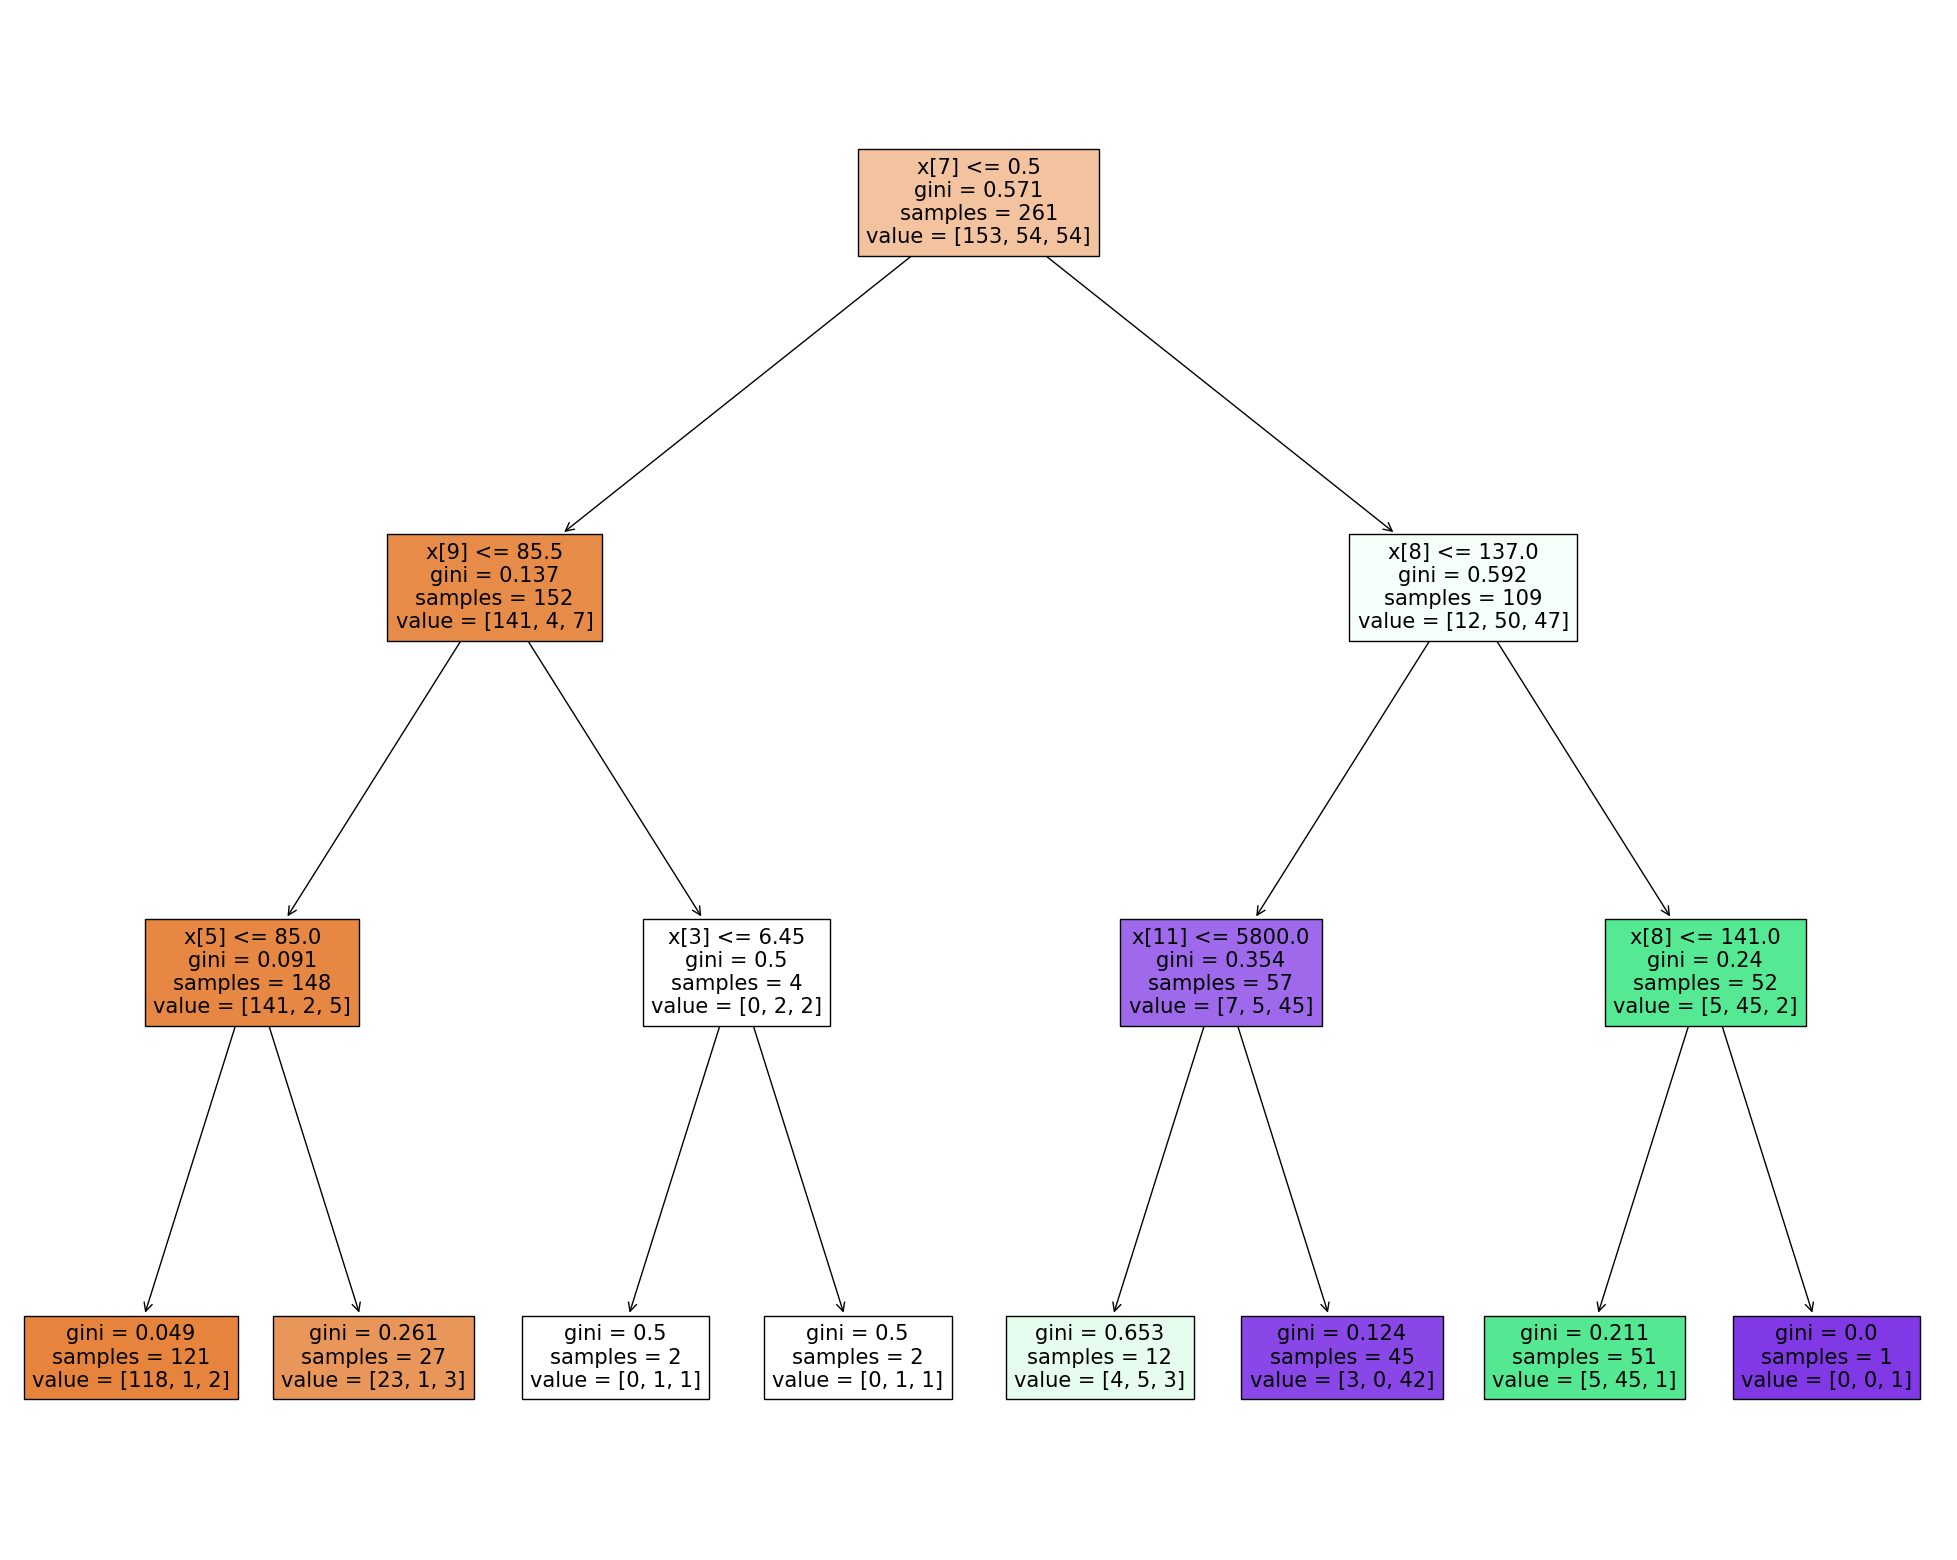

In [28]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(model1, filled=True)

## Modelado Random Forest

In [29]:
# Entrenamiento
model2 = RandomForestClassifier()
model2.fit(X_train,y_train)

RandomForestClassifier()

In [30]:
# Predicciones
prediction2 = model2.predict(X_test)
prediction2

array([0, 1, 2, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 2, 2, 1, 0, 1, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 1, 2, 1,
       0, 0, 1, 1, 1, 0, 2, 0, 2, 0, 0, 1, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0,
       0, 1, 2, 2, 0, 0, 0, 1, 0, 2, 1, 1, 0, 0, 0, 0, 1, 1, 0, 2, 0, 0,
       0, 0, 0, 1, 1, 2, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0])

In [31]:
# Evaluación
print(confusion_matrix(y_test, prediction2))

[[62  3  1]
 [ 3 20  1]
 [ 2  2 19]]


In [32]:
print(classification_report(y_test,prediction2))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93        66
           1       0.80      0.83      0.82        24
           2       0.90      0.83      0.86        23

    accuracy                           0.89       113
   macro avg       0.88      0.87      0.87       113
weighted avg       0.89      0.89      0.89       113

